# Question1

In Health Administration Programs conducting satisfaction surveys are usually covered in courses on quality improvement.  This exercise shows how data from satisfaction surveys can be analyzed over time. Assume that, in different time periods, 4 randomly selected patients rated their satisfaction with our services.  Are we improving?

Step1.Import Library and read excel file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
data = pd.read_excel('dataxbar.xls')
data

,Time Period,Ratings of 1st Patient,Ratings of 2nd Patient,Ratings of 3rd Patient,Ratings of 4th Patient
0,1,80,84.0,82.0,80
1,2,70,72.0,74.0,70
2,3,76,78.0,76.0,78
3,4,80,NaN,NaN,80


Step2.Create Two Dataframes

In [3]:
### Create the dataframe to calculate mean for each time period
data1 = pd.DataFrame(data, columns=['Ratings of 1st Patient', 'Ratings of 2nd Patient', 
                                    'Ratings of 3rd Patient', 'Ratings of 4th Patient'], dtype = float)

In [4]:
### Create the dataframe to calculate standard deviation for each time period
data2 = pd.DataFrame(data, columns=['Ratings of 1st Patient', 'Ratings of 2nd Patient', 
                                    'Ratings of 3rd Patient', 'Ratings of 4th Patient'], dtype = float)

In [5]:
data1

,Ratings of 1st Patient,Ratings of 2nd Patient,Ratings of 3rd Patient,Ratings of 4th Patient
0,80.0,84.0,82.0,80.0
1,70.0,72.0,74.0,70.0
2,76.0,78.0,76.0,78.0
3,80.0,NaN,NaN,80.0


In [6]:
data2

,Ratings of 1st Patient,Ratings of 2nd Patient,Ratings of 3rd Patient,Ratings of 4th Patient
0,80.0,84.0,82.0,80.0
1,70.0,72.0,74.0,70.0
2,76.0,78.0,76.0,78.0
3,80.0,NaN,NaN,80.0


Step3.Calculate the mean for each time period and assign thoes value to new column named "Average Rating"

In [7]:
### According to foundation: Average(Mean) = Sum of the terms / Number of terms
data1['Average Rating'] = data1.mean(axis=1, skipna = True)
data1

,Ratings of 1st Patient,Ratings of 2nd Patient,Ratings of 3rd Patient,Ratings of 4th Patient,Average Rating
0,80.0,84.0,82.0,80.0,81.5
1,70.0,72.0,74.0,70.0,71.5
2,76.0,78.0,76.0,78.0,77.0
3,80.0,NaN,NaN,80.0,80.0


Step4.Calculate Standard Deviation of All Values

In [8]:
all_std = round(data2.stack().std(axis=0,skipna=True),2)
all_std

4.35

Step5.Calculate Standard Deviation for Each Time Period

In [9]:
data2['Std for Period']=round(all_std/np.sqrt(data2.count(axis=1)),2)
data2['Std for Period']

0    2.17
1    2.17
2    2.17
3    3.08
Name: Std for Period, dtype: float64

Step6.Calculate Average for All Values

In [10]:
all_mean = round(data1.stack().mean(axis=0,skipna = True),2)
all_mean

77.22

Step7.Prepare Dataframe to Plot

In [11]:
### Calculate the upper control limit and lower limit
data['UCL'] = round(all_mean+data2['Std for Period']*1.96,2)
data['LCL'] = round(all_mean-data2['Std for Period']*1.96,2)

In [12]:
### Prepare Dataframe require to plot graph
data['Average Rating'] = data1['Average Rating']
data3 = pd.DataFrame(data,columns=['Time Period','Average Rating', 'LCL', 'UCL'])
data3

,Time Period,Average Rating,LCL,UCL
0,1,81.5,72.97,81.47
1,2,71.5,72.97,81.47
2,3,77.0,72.97,81.47
3,4,80.0,71.18,83.26


Step8. Plot the graph of the control limits and the observations

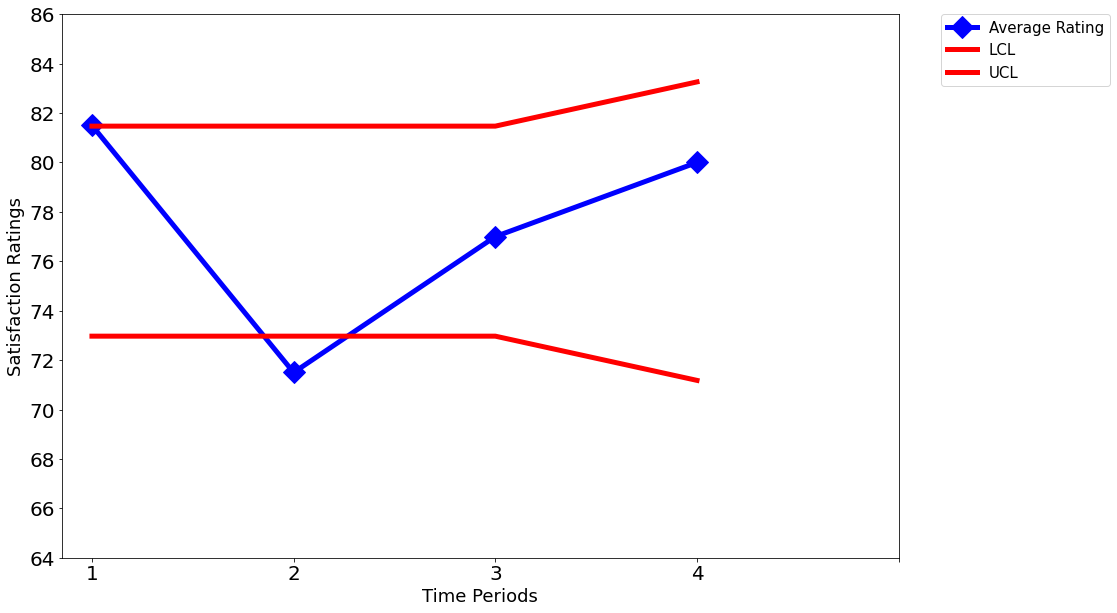

In [13]:
data3['Average Rating'].plot(marker='D',markersize=15, color='b',linewidth=5,figsize=(15,10),fontsize=20)
data3['LCL'].plot(color='r',linewidth=5)
data3['UCL'].plot(color='r',linewidth=5)
plot.xlabel('Time Periods', fontsize=18)
plot.ylabel('Satisfaction Ratings',fontsize=18)
plot.legend(bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0., fontsize=15)
plot.xticks(data3['Time Period'], data3['Time Period'])
plot.xticks(np.arange(0,5,1))
plot.yticks(np.arange(64,88,2))
plot.show()

# Question 2

In Health Administration programs accounting courses typically cover cost data.  Forensic accounting examines tries to detect fraud through accounting procedures. Following data were obtained regarding the cost of taking care of patients over several time periods.  Are our costs within expectation?

Step1.Import Library and read excel file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data for Q2 Comparison of means.xlsx')
df

,Patient,July cost,July Expected cost,Aug cost,Aug expected cost,Sept cost,Sept expected cost
0,1,391.18,294.28,395.55,497.68,394.96,324.05
1,2,368.31,287.93,378.42,495.00,398.35,328.70
2,3,411.41,330.08,413.93,348.85,365.64,292.31
3,4,446.07,379.48,362.86,395.00,389.66,313.26
4,5,425.54,373.22,416.01,342.39,395.53,343.70
5,6,476.90,418.52,405.66,427.00,481.25,412.47
6,7,423.83,357.52,412.05,400.00,444.77,366.55
7,8,370.29,290.42,384.08,500.00,436.31,338.64
8,9,353.98,268.20,,NaN,412.00,335.22
9,10,429.87,358.43,,NaN,NaN,NaN


In [3]:
df.dtypes

Patient                 int64
July cost             float64
July Expected cost    float64
Aug cost               object
Aug expected cost     float64
Sept cost             float64
Sept expected cost    float64
dtype: object

In [4]:
df['Aug cost']=pd.to_numeric(df['Aug cost'], errors='coerce')

In [5]:
df.dtypes

Patient                 int64
July cost             float64
July Expected cost    float64
Aug cost              float64
Aug expected cost     float64
Sept cost             float64
Sept expected cost    float64
dtype: object

In [6]:
df

,Patient,July cost,July Expected cost,Aug cost,Aug expected cost,Sept cost,Sept expected cost
0,1,391.18,294.28,395.55,497.68,394.96,324.05
1,2,368.31,287.93,378.42,495.00,398.35,328.70
2,3,411.41,330.08,413.93,348.85,365.64,292.31
3,4,446.07,379.48,362.86,395.00,389.66,313.26
4,5,425.54,373.22,416.01,342.39,395.53,343.70
5,6,476.90,418.52,405.66,427.00,481.25,412.47
6,7,423.83,357.52,412.05,400.00,444.77,366.55
7,8,370.29,290.42,384.08,500.00,436.31,338.64
8,9,353.98,268.20,NaN,NaN,412.00,335.22
9,10,429.87,358.43,NaN,NaN,NaN,NaN


In [7]:
df.loc['Avg'] = df.mean()
df

,Patient,July cost,July Expected cost,Aug cost,Aug expected cost,Sept cost,Sept expected cost
0,1.0,391.180,294.280,395.55,497.68,394.960000,324.050000
1,2.0,368.310,287.930,378.42,495.00,398.350000,328.700000
2,3.0,411.410,330.080,413.93,348.85,365.640000,292.310000
3,4.0,446.070,379.480,362.86,395.00,389.660000,313.260000
4,5.0,425.540,373.220,416.01,342.39,395.530000,343.700000
5,6.0,476.900,418.520,405.66,427.00,481.250000,412.470000
6,7.0,423.830,357.520,412.05,400.00,444.770000,366.550000
7,8.0,370.290,290.420,384.08,500.00,436.310000,338.640000
8,9.0,353.980,268.200,NaN,NaN,412.000000,335.220000
9,10.0,429.870,358.430,NaN,NaN,NaN,NaN


In [8]:
df['July cost diff'] = df['July cost']-df['July Expected cost']
df['Aug cost diff'] = df['Aug cost']-df['Aug expected cost']
df['Sept cost diff'] = df['Sept cost']-df['Sept expected cost']
df

,Patient,July cost,July Expected cost,Aug cost,Aug expected cost,Sept cost,Sept expected cost,July cost diff,Aug cost diff,Sept cost diff
0,1.0,391.180,294.280,395.55,497.68,394.960000,324.050000,96.90,-102.13,70.91
1,2.0,368.310,287.930,378.42,495.00,398.350000,328.700000,80.38,-116.58,69.65
2,3.0,411.410,330.080,413.93,348.85,365.640000,292.310000,81.33,65.08,73.33
3,4.0,446.070,379.480,362.86,395.00,389.660000,313.260000,66.59,-32.14,76.40
4,5.0,425.540,373.220,416.01,342.39,395.530000,343.700000,52.32,73.62,51.83
5,6.0,476.900,418.520,405.66,427.00,481.250000,412.470000,58.38,-21.34,68.78
6,7.0,423.830,357.520,412.05,400.00,444.770000,366.550000,66.31,12.05,78.22
7,8.0,370.290,290.420,384.08,500.00,436.310000,338.640000,79.87,-115.92,97.67
8,9.0,353.980,268.200,NaN,NaN,412.000000,335.220000,85.78,NaN,76.78
9,10.0,429.870,358.430,NaN,NaN,NaN,NaN,71.44,NaN,NaN


In [9]:
np_July = int(df['July cost diff'].count()) - 1
ac_July = float(df.loc[['Avg'],['July cost']].values)
aec_July = float(df.loc[['Avg'],['July Expected cost']].values)
ac_July

409.738

In [10]:
np_Aug = int(df['Aug cost diff'].count()) - 1
ac_Aug = float(df.loc[['Avg'],['Aug cost']].values)
aec_Aug = float(df.loc[['Avg'],['Aug expected cost']].values)

In [11]:
np_Sept = int(df['Sept cost diff'].count()) - 1
ac_Sept = float(df.loc[['Avg'],['Sept cost']].values)
aec_Sept = float(df.loc[['Avg'],['Sept expected cost']].values)

In [12]:
rows = range(0,10)
columns = ['July cost diff','Aug cost diff', 'Sept cost diff']
df1 = df.loc[rows,columns]
df1

,July cost diff,Aug cost diff,Sept cost diff
0,96.90,-102.13,70.91
1,80.38,-116.58,69.65
2,81.33,65.08,73.33
3,66.59,-32.14,76.40
4,52.32,73.62,51.83
5,58.38,-21.34,68.78
6,66.31,12.05,78.22
7,79.87,-115.92,97.67
8,85.78,NaN,76.78
9,71.44,NaN,NaN


In [13]:
stdev_acd = df1.stack().std()
stdev_acd

63.48313845271253

In [14]:
df2 = [['July',stdev_acd,np_July,ac_July,aec_July],
       ['August',stdev_acd,np_July,ac_July,aec_July],
       ['September',stdev_acd,np_July,ac_July,aec_July]]
df3 = pd.DataFrame(df2,columns = ['Month','StDev_acd','N','Avg_Cost','Avg_Expected_Cost'])
df3

,Month,StDev_acd,N,Avg_Cost,Avg_Expected_Cost
0,July,63.483138,10,409.738000,335.808000
1,August,63.483138,8,396.070000,425.740000
2,September,63.483138,9,413.163333,339.433333


In [15]:
df3['Sqrt(N)'] = np.sqrt(df3['N'])
df3

,Month,StDev_acd,N,Avg_Cost,Avg_Expected_Cost,Sqrt(N)
0,July,63.483138,10,409.738000,335.808000,3.162278
1,August,63.483138,8,396.070000,425.740000,2.828427
2,September,63.483138,9,413.163333,339.433333,3.000000


In [16]:
df3['StDev'] = df3['StDev_acd']/df3['Sqrt(N)']
df3

,Month,StDev_acd,N,Avg_Cost,Avg_Expected_Cost,Sqrt(N),StDev
0,July,63.483138,10,409.738000,335.808000,3.162278,20.075131
1,August,63.483138,8,396.070000,425.740000,2.828427,22.444679
2,September,63.483138,9,413.163333,339.433333,3.000000,21.161046


In [17]:
T_value = [3.169, 3.355, 3.250]
df3['T_Value'] = T_value
df3

,Month,StDev_acd,N,Avg_Cost,Avg_Expected_Cost,Sqrt(N),StDev,T_Value
0,July,63.483138,10,409.738000,335.808000,3.162278,20.075131,3.169
1,August,63.483138,8,396.070000,425.740000,2.828427,22.444679,3.355
2,September,63.483138,9,413.163333,339.433333,3.000000,21.161046,3.250


In [18]:
df3['Upper_Control_Limit'] = df3['Avg_Expected_Cost']+(df3['T_Value']*df3['StDev'])
df3['Lower_Control_Limit'] = df3['Avg_Expected_Cost']-(df3['T_Value']*df3['StDev'])
df3

,Month,StDev_acd,N,Avg_Cost,Avg_Expected_Cost,Sqrt(N),StDev,T_Value,Upper_Control_Limit,Lower_Control_Limit
0,July,63.483138,10,409.738000,335.808000,3.162278,20.075131,3.169,399.426090,272.189910
1,August,63.483138,8,396.070000,425.740000,2.828427,22.444679,3.355,501.041898,350.438102
2,September,63.483138,9,413.163333,339.433333,3.000000,21.161046,3.250,408.206733,270.659933


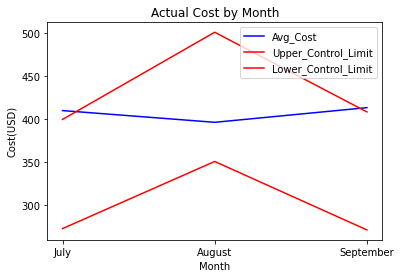

In [36]:
plt.plot('Month','Avg_Cost',data=df3,marker='D',markersize = 0,color = 'blue')
plt.plot('Month','Upper_Control_Limit',data=df3,markersize = 0,color = 'red')
plt.plot('Month','Lower_Control_Limit',data=df3,markersize = 0,color = 'red')
plt.legend()
plt.title('Actual Cost by Month')
plt.xlabel('Month')
plt.ylabel('Cost(USD)')
plt.show()

# Conclusion

* July: costs ARE NOT within expectation
* August: costs ARE within expectation
* September: costs ARE NOT within expectation
* Costs are only within expectation in August

# Question 3

Payment reform has made hospital payments more complex.  One issue in payment reform is whether the net payments to hospitals is decreasing because of numerous carve outs for never-events.  In health administration programs, payment reform is covered in several courses including courses on value-based payments, finance, quality and strategic planning.  In this assignment, examine if payments for AMI have declined over 4 time periods indicated in the table below.  Keep in mind that start and end periods of data are also given inside the files and that these do not correspond to the database reporting year.  Also note that the name of variables and files change over the years. Make sure that you download data for every year the measure PAYM_30_AMI is available for all available hospitals.  In these files the denominator indicates the number of patients.  Payment indicates average payment per patient.  Select data for hospitals that had at least 100 patients.  Submit a control chart for the data.

In [382]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [383]:
data_2015=pd.read_csv('Payment_and_Value_of_Care_2015.csv')
data_2016=pd.read_csv('Payment_and_Value_of_Care_2016.csv')
data_2017=pd.read_csv('Payment_and_Value_of_Care_2017.csv')
data_2018=pd.read_csv('Payment_and_Value_of_Care_2018.csv')

In [384]:
#View data in dataframe for 2015
data_2015.head(1)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure end date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart attack patients,PAYM_30_AMI,...,"$21,376","$20,320","$22,521",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2011,06/30/2014


In [385]:
#View data in dataframe for 2016
data_2016.head(1)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure end date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart attack patients,PAYM_30_AMI,...,"$21,804","$20,744","$22,932",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015


In [386]:
#View data in dataframe for 2017
data_2017.head(1)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure end date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart attack patients,PAYM_30_AMI,...,"$22,178","$21,108","$23,323",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2013,06/30/2016


In [387]:
#View data in dataframe for 2018
data_2018.head(1)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure end date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart attack patients,PAYM_30_AMI,...,"$23,394","$22,216","$24,641",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2014,06/30/2017


In [388]:
#Create seperate dataframes with limited number of selected columns for each time period
data_2015_filtered=pd.DataFrame(data_2015, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2016_filtered=pd.DataFrame(data_2016, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2017_filtered=pd.DataFrame(data_2017, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2018_filtered=pd.DataFrame(data_2018, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])

In [389]:
#Check Resulting Dataframe for 2019
data_2015_filtered.head(3)

,Provider ID,Hospital name,Payment measure ID,Denominator,Payment,Measure start date,Measure end date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,PAYM_30_AMI,681,"$21,376",07/01/2011,06/30/2014
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,PAYM_30_HF,733,"$14,740",07/01/2011,06/30/2014
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,PAYM_30_PN,367,"$15,263",07/01/2011,06/30/2014


In [390]:
#Check Resulting Dataframe for 2019
data_2016_filtered.head(3)

,Provider ID,Hospital name,Payment measure ID,Denominator,Payment,Measure start date,Measure end date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,PAYM_30_AMI,707,"$21,804",07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,PAYM_30_HF,754,"$15,659",07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,PAYM_30_PN,404,"$15,089",07/01/2012,06/30/2015


In [391]:
#Find number of rows and columns for the four data frames
print(data_2015_filtered.shape)
print(data_2016_filtered.shape)
print(data_2017_filtered.shape)
print(data_2018_filtered.shape)

(14301, 7)
(14421, 7)
(19248, 7)
(19172, 7)


In [392]:
#Determine data types. Result show that the Payment and Denominator  Columns need to converted to float data type.
print("\033[1m"+'2015 Data Types' + "\033[0m")
print(data_2015_filtered.dtypes)

print("\033[1m"+'2016 Data Types' + "\033[0m")
print(data_2016_filtered.dtypes)

print("\033[1m"+'2017 Data Types' + "\033[0m")
print(data_2017_filtered.dtypes)

print("\033[1m"+'2018 Data Types' + "\033[0m")
print(data_2018_filtered.dtypes)

2015 Data Types
Provider ID           object
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2016 Data Types
Provider ID            int64
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2017 Data Types
Provider ID            int64
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2018 Data Types
Provider ID            int64
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object


In [115]:
#Check for non numeric values in the Payment column for the above data frames. In this instance, we are using the 2011 year
#The traceback feedback includes a value Error and shows that it could not convert the $12,132 string to a float.
#Changing the Denominator column is easily done using the pd.to_numeric() function
data_2015_filtered['Payment'].astype('float')

ValueError: could not convert string to float: '$21,376'

In [393]:
#Remove the '$' and ',' using str.replace for the Payment column
data_2015_filtered['Payment'] = data_2015_filtered['Payment'].str.replace(',','')
data_2015_filtered['Payment'] = data_2015_filtered['Payment'].str.replace('$','')

data_2016_filtered['Payment'] = data_2016_filtered['Payment'].str.replace(',','')
data_2016_filtered['Payment'] = data_2016_filtered['Payment'].str.replace('$','')

data_2017_filtered['Payment'] = data_2017_filtered['Payment'].str.replace(',','')
data_2017_filtered['Payment'] = data_2017_filtered['Payment'].str.replace('$','')

data_2018_filtered['Payment'] = data_2018_filtered['Payment'].str.replace(',','')
data_2018_filtered['Payment'] = data_2018_filtered['Payment'].str.replace('$','')

print("\033[1m" +'2015 Payment' + "\033[0m")
print(data_2015_filtered['Payment'].head(10))
print("\033[1m" +'2016 Payment' + "\033[0m")
print(data_2016_filtered['Payment'].head(10))
print("\033[1m" +'2017 Payment' + "\033[0m")
print(data_2017_filtered['Payment'].head(10))
print("\033[1m" +'2018 Payment' + "\033[0m")
print(data_2018_filtered['Payment'].head(10))

2015 Payment
0            21376
1            14740
2            15263
3            21601
4            15087
5            14199
6            20247
7            14784
8            14018
9    Not Available
Name: Payment, dtype: object
2016 Payment
0            21804
1            15659
2            15089
3            23171
4            16376
5            14384
6            20946
7            14880
8            15066
9    Not Available
Name: Payment, dtype: object
2017 Payment
0    22178
1    16525
2    26863
3    17230
4    22133
5    16321
6    23545
7    15882
8    22682
9    15465
Name: Payment, dtype: object
2018 Payment
0    23394
1    17041
2    25812
3    18281
4    22579
5    15819
6    22747
7    15614
8    24002
9    16334
Name: Payment, dtype: object


In [394]:
#Replace the "Not Available" entries with 0 and convert Payment column to a float
data_2015_filtered['Payment']=pd.to_numeric(data_2015_filtered['Payment'], errors='coerce')
data_2015_filtered=data_2015_filtered.replace(np.nan, 0, regex=True)
data_2016_filtered['Payment']=pd.to_numeric(data_2016_filtered['Payment'], errors='coerce')
data_2016_filtered=data_2016_filtered.replace(np.nan, 0, regex=True)
data_2017_filtered['Payment']=pd.to_numeric(data_2017_filtered['Payment'], errors='coerce')
data_2017_filtered=data_2017_filtered.replace(np.nan, 0, regex=True)
data_2018_filtered['Payment']=pd.to_numeric(data_2018_filtered['Payment'], errors='coerce')
data_2018_filtered=data_2018_filtered.replace(np.nan, 0, regex=True)

In [395]:
print("\033[1m" +'2015 Payment in Float type' + "\033[0m")
print(data_2015_filtered['Payment'].head(10))
print("\033[1m" +'2016 Payment in Float type'+"\033[0m")
print(data_2016_filtered['Payment'].head(10))
print("\033[1m" +'2017 Payment in Float type'+"\033[0m")
print(data_2017_filtered['Payment'].head(10))
print("\033[1m" +'2018 Payment in Float type'+"\033[0m")
print(data_2018_filtered['Payment'].head(10))

2015 Payment in Float type
0    21376.0
1    14740.0
2    15263.0
3    21601.0
4    15087.0
5    14199.0
6    20247.0
7    14784.0
8    14018.0
9        0.0
Name: Payment, dtype: float64
2016 Payment in Float type
0    21804.0
1    15659.0
2    15089.0
3    23171.0
4    16376.0
5    14384.0
6    20946.0
7    14880.0
8    15066.0
9        0.0
Name: Payment, dtype: float64
2017 Payment in Float type
0    22178.0
1    16525.0
2    26863.0
3    17230.0
4    22133.0
5    16321.0
6    23545.0
7    15882.0
8    22682.0
9    15465.0
Name: Payment, dtype: float64
2018 Payment in Float type
0    23394.0
1    17041.0
2    25812.0
3    18281.0
4    22579.0
5    15819.0
6    22747.0
7    15614.0
8    24002.0
9    16334.0
Name: Payment, dtype: float64


In [396]:
#Converting the 'Denominator' data type to float
#If 'coerce', then invalid parsing will be set as NaN.
data_2015_filtered['Denominator']=pd.to_numeric(data_2015_filtered['Denominator'], errors = 'coerce')
data_2016_filtered['Denominator']=pd.to_numeric(data_2016_filtered['Denominator'], errors = 'coerce')
data_2017_filtered['Denominator']=pd.to_numeric(data_2017_filtered['Denominator'], errors = 'coerce')
data_2018_filtered['Denominator']=pd.to_numeric(data_2018_filtered['Denominator'], errors = 'coerce')

In [397]:
#Check data type for 2015 dataframe. Note that the Payment column is now of float datatype
data_2015_filtered.dtypes

Provider ID            object
Hospital name          object
Payment measure ID     object
Denominator           float64
Payment               float64
Measure start date     object
Measure end date       object
dtype: object

In [398]:
#Filter by 'Denominator' 100 or more and limit to PATM_30_AMI measure as well as payment is not 0
data_2015_filtered2=pd.DataFrame(data_2015_filtered[(data_2015_filtered['Denominator']>=100) &
                                (data_2015_filtered['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2015_filtered['Payment'] > 0)])
print("\033[1m"+'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2.head(10))

2015 Filtered Dataset
   Provider ID                     Hospital name Payment measure ID  \
0       010001  SOUTHEAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
6       010006    ELIZA COFFEE MEMORIAL HOSPITAL        PAYM_30_AMI   
15      010011                 ST VINCENT'S EAST        PAYM_30_AMI   
18      010012    DEKALB REGIONAL MEDICAL CENTER        PAYM_30_AMI   
21      010016     SHELBY BAPTIST MEDICAL CENTER        PAYM_30_AMI   
36      010023      BAPTIST MEDICAL CENTER SOUTH        PAYM_30_AMI   
39      010024     JACKSON HOSPITAL & CLINIC INC        PAYM_30_AMI   
42      010029       EAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
48      010033    UNIVERSITY OF ALABAMA HOSPITAL        PAYM_30_AMI   
66      010040   GADSDEN REGIONAL MEDICAL CENTER        PAYM_30_AMI   

    Denominator  Payment Measure start date Measure end date  
0         681.0  21376.0         07/01/2011       06/30/2014  
6         303.0  20247.0         07/01/2011       06/30/2014  
15     

In [399]:
#Filter by 'Denominator' 100 or more and limit to PATM_30_AMI measure as well as payment is not 0
data_2016_filtered2=pd.DataFrame(data_2016_filtered[(data_2016_filtered['Denominator']>=100) &
                                (data_2016_filtered['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2016_filtered['Payment'] > 0)])
print("\033[1m"+'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2.head(10))

2016 Filtered Dataset
    Provider ID                     Hospital name Payment measure ID  \
0         10001  SOUTHEAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
6         10006    ELIZA COFFEE MEMORIAL HOSPITAL        PAYM_30_AMI   
15        10011                 ST VINCENT'S EAST        PAYM_30_AMI   
18        10012    DEKALB REGIONAL MEDICAL CENTER        PAYM_30_AMI   
21        10016     SHELBY BAPTIST MEDICAL CENTER        PAYM_30_AMI   
36        10023      BAPTIST MEDICAL CENTER SOUTH        PAYM_30_AMI   
39        10024     JACKSON HOSPITAL & CLINIC INC        PAYM_30_AMI   
42        10029       EAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
48        10033    UNIVERSITY OF ALABAMA HOSPITAL        PAYM_30_AMI   
54        10035   CULLMAN REGIONAL MEDICAL CENTER        PAYM_30_AMI   

    Denominator  Payment Measure start date Measure end date  
0         707.0  21804.0         07/01/2012       06/30/2015  
6         353.0  20946.0         07/01/2012       06/30/201

In [400]:
#Filter by 'Denominator' 100 or more and limit to PATM_30_AMI measure as well as payment is not 0
data_2017_filtered2=pd.DataFrame(data_2017_filtered[(data_2017_filtered['Denominator']>=100) &
                                (data_2017_filtered['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2017_filtered['Payment'] > 0)])
print("\033[1m" + '2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2.head(10))

2017 Filtered Dataset
    Provider ID                     Hospital name Payment measure ID  \
0         10001  SOUTHEAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
8         10006    ELIZA COFFEE MEMORIAL HOSPITAL        PAYM_30_AMI   
20        10011                 ST VINCENT'S EAST        PAYM_30_AMI   
24        10012    DEKALB REGIONAL MEDICAL CENTER        PAYM_30_AMI   
28        10016     SHELBY BAPTIST MEDICAL CENTER        PAYM_30_AMI   
48        10023      BAPTIST MEDICAL CENTER SOUTH        PAYM_30_AMI   
52        10024     JACKSON HOSPITAL & CLINIC INC        PAYM_30_AMI   
56        10029       EAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
64        10033    UNIVERSITY OF ALABAMA HOSPITAL        PAYM_30_AMI   
72        10035   CULLMAN REGIONAL MEDICAL CENTER        PAYM_30_AMI   

    Denominator  Payment Measure start date Measure end date  
0         716.0  22178.0         07/01/2013       06/30/2016  
8         389.0  22682.0         07/01/2013       06/30/201

In [401]:
#Filter by 'Denominator' 100 or more and limit to PATM_30_AMI measure as well as payment is not 0
data_2018_filtered2=pd.DataFrame(data_2018_filtered[(data_2018_filtered['Denominator']>=100) &
                                (data_2018_filtered['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2018_filtered['Payment'] > 0)])
print("\033[1m"+'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2.head(10))

2018 Filtered Dataset
    Provider ID                     Hospital name Payment measure ID  \
0         10001  SOUTHEAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
8         10006    ELIZA COFFEE MEMORIAL HOSPITAL        PAYM_30_AMI   
20        10011                 ST VINCENT'S EAST        PAYM_30_AMI   
24        10012    DEKALB REGIONAL MEDICAL CENTER        PAYM_30_AMI   
28        10016     SHELBY BAPTIST MEDICAL CENTER        PAYM_30_AMI   
48        10023      BAPTIST MEDICAL CENTER SOUTH        PAYM_30_AMI   
52        10024     JACKSON HOSPITAL & CLINIC INC        PAYM_30_AMI   
56        10029       EAST ALABAMA MEDICAL CENTER        PAYM_30_AMI   
64        10033    UNIVERSITY OF ALABAMA HOSPITAL        PAYM_30_AMI   
72        10035   CULLMAN REGIONAL MEDICAL CENTER        PAYM_30_AMI   

    Denominator  Payment Measure start date Measure end date  
0         715.0  23394.0         07/01/2014       06/30/2017  
8         391.0  24002.0         07/01/2014       06/30/201

In [402]:
#Number of rows and columns from filtered dataframes
print(data_2015_filtered2.shape)
print(data_2016_filtered2.shape)
print(data_2017_filtered2.shape)
print(data_2018_filtered2.shape)

(1437, 7)
(1442, 7)
(1457, 7)
(1476, 7)


In [403]:
#Calculate average payment across all hospitals for the four time periods
data_2015_filtered2['avg_payment_2015'] = data_2015_filtered2['Payment'].mean()
avg_payment_2015 = data_2015_filtered2['Payment'].mean()
avg_payment_2016 = data_2016_filtered2['Payment'].mean()
avg_payment_2017 = data_2017_filtered2['Payment'].mean()
avg_payment_2018 = data_2018_filtered2['Payment'].mean()
print(avg_payment_2015)
print(avg_payment_2016)
print(avg_payment_2017)
print(avg_payment_2018)

22389.60890744607
22389.60890744607
22389.60890744607
22389.60890744607


In [404]:
#Create a data frame containing Payment data from all 4 years
df = [data_2015_filtered2['Payment'], data_2016_filtered2['Payment'],
      data_2017_filtered2['Payment'], data_2018_filtered2['Payment']]
headers = ['Payment2015', 'Payment2016', 'Payment2017', 'Payment2018']
df1=pd.concat(df,axis=1,keys=headers)
df1.head()

,Payment2015,Payment2016,Payment2017,Payment2018
0,21376.0,21804.0,22178.0,23394.0
6,20247.0,20946.0,NaN,NaN
8,NaN,NaN,22682.0,24002.0
15,21921.0,22720.0,NaN,NaN
18,20284.0,22997.0,NaN,NaN


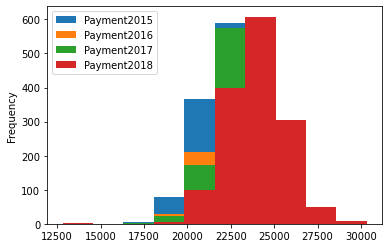

In [405]:
#Check for Normal Distribution
df1[["Payment2015", "Payment2016", "Payment2017", "Payment2018"]].plot.hist()

In [406]:
#Number of rows and columns
df1.shape

(4210, 4)

In [407]:
#Check data type for dataframe
df1.dtypes

Payment2015    float64
Payment2016    float64
Payment2017    float64
Payment2018    float64
dtype: object

In [408]:
#Grand Average
avgall=df1.stack().mean()
avgall

23205.991225051617

In [409]:
#Average per time period
avg2015=df1['Payment2015'].mean()
avg2016=df1['Payment2016'].mean()
avg2017=df1['Payment2017'].mean()
avg2018=df1['Payment2018'].mean()

In [410]:
print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)

22389.60890744607
23144.69764216366
23297.18874399451
23970.66056910569


In [411]:
#Standard Deviation for all data across the 4 years
stdall=df1.stack().std()
stdall

1752.0586236906636

In [412]:
#Find Count of hospitals in each year
n_2015=int(df1['Payment2015'].count())
n_2016=int(df1['Payment2016'].count())
n_2017=int(df1['Payment2017'].count())
n_2018=int(df1['Payment2018'].count())
print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)

1437
1442
1457
1476


In [413]:
#Standard Deviation of each timeperiod
std2015=stdall/(math.sqrt(n_2015))
std2016=stdall/(math.sqrt(n_2016))
std2017=stdall/(math.sqrt(n_2017))
std2018=stdall/(math.sqrt(n_2018))
print(std2015)
print(std2016)
print(std2017)
print(std2018)

46.21896856882825
46.1387690141002
45.90065232547873
45.60426438519076


In [414]:
zstat = 1.96

In [415]:
#Create dataframe holding values that will support the calculation of UCL and LCL
df3 = [['2015',avg2015,stdall,std2015,avgall,zstat],
       ['2016',avg2016,stdall,std2016,avgall,zstat],
       ['2017',avg2017,stdall,std2017,avgall,zstat],
       ['2018',avg2018,stdall,std2018,avgall,zstat]]
df3

[['2015',
  22389.60890744607,
  1752.0586236906636,
  46.21896856882825,
  23205.991225051617,
  1.96],
 ['2016',
  23144.69764216366,
  1752.0586236906636,
  46.1387690141002,
  23205.991225051617,
  1.96],
 ['2017',
  23297.18874399451,
  1752.0586236906636,
  45.90065232547873,
  23205.991225051617,
  1.96],
 ['2018',
  23970.66056910569,
  1752.0586236906636,
  45.60426438519076,
  23205.991225051617,
  1.96]]

In [416]:
#Add column names to the df3 dataframe
df4=pd.DataFrame(df3,columns=['Years','Average Payment','StdAll','StdPerTime','AvgPaymentAll','zstat'])
df4

,Years,Average Payment,StdAll,StdPerTime,AvgPaymentAll,zstat
0,2015,22389.608907,1752.058624,46.218969,23205.991225,1.96
1,2016,23144.697642,1752.058624,46.138769,23205.991225,1.96
2,2017,23297.188744,1752.058624,45.900652,23205.991225,1.96
3,2018,23970.660569,1752.058624,45.604264,23205.991225,1.96


In [417]:
df4.dtypes

Years               object
Average Payment    float64
StdAll             float64
StdPerTime         float64
AvgPaymentAll      float64
zstat              float64
dtype: object

In [418]:
#Calculate the UCL and LCL columns
df4['UCL']=df4['AvgPaymentAll']+df4['zstat']*df4['StdPerTime']
df4['LCL']=df4['AvgPaymentAll']-df4['zstat']*df4['StdPerTime']
df4

,Years,Average Payment,StdAll,StdPerTime,AvgPaymentAll,zstat,UCL,LCL
0,2015,22389.608907,1752.058624,46.218969,23205.991225,1.96,23296.580403,23115.402047
1,2016,23144.697642,1752.058624,46.138769,23205.991225,1.96,23296.423212,23115.559238
2,2017,23297.188744,1752.058624,45.900652,23205.991225,1.96,23295.956504,23116.025946
3,2018,23970.660569,1752.058624,45.604264,23205.991225,1.96,23295.375583,23116.606867


ValueError: x and y must have same first dimension, but have shapes (1,) and (4,)

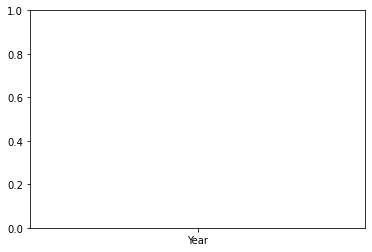

In [419]:
#Create the xbar chart
plt.plot('Year','Average Payment',data=df4,marker = 's', markerfacecolor = 'blue',
         linewidth =1, color = 'blue')
plt.plot('Year', 'UCL',data=df4, markersize = 0, color = 'red', linewidth=1)
plt.plot('Year', 'LCL',data=df4, markersize = 0, color = 'red', linewidth=1)
plt.legend()
plt.title('Average Payment Trend By Year')
plt.xlabel('Year')
plt.ylabel('Mean Cost in USD')

# Conclusion

In [ ]:
########
(1) Net payments to hospitals for AMI is increasing.
(2) In 2011, average payments were lowest and below the lower control limit. 
Such a low payment was not due to chance.  
(3) Over the next 2 years, payments increased but fell within the upper and lower control limits,
reflective of outcome based on chance.  
(4) The real change in average payment occurred in 2014.  This change is not due to chance. 
(5) Thus payment reform has resulted increased net payments to hospitals for AMI treatment. 
Numerous carve outs for never-events have not been an issue.
########

# Question 4

In [270]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [280]:
data_2014=pd.read_csv('HCAHPS_2015.csv',engine='python')
data_2015=pd.read_csv('HCAHPS_2016.csv',engine='python')
data_2016=pd.read_csv('HCAHPS_2017.csv',engine='python')
data_2017=pd.read_csv('HCAHPS_2018.csv',engine='python')
data_2018=pd.read_csv('HCAHPS_2019.csv',engine='python')

In [281]:
data_2014.head()


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,NaN,66,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,NaN,12,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015


In [282]:
#Determine column names for each of the data frames.
#Notice that some crtical column names have change for the 2018 dataset
print("\033[1m" +'2014 Data Types' + "\033[0m")
print(data_2014.columns)

print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015.columns)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016.columns)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017.columns)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018.columns)

2014 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date'],
      dtype='object')
2015 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Numb

In [283]:
#Create seperate dataframes with limited number of selected columns for each time period
data_2014_filtered=pd.DataFrame(data_2014, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2014_filtered=data_2014_filtered[data_2014_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2015_filtered=pd.DataFrame(data_2015, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2015_filtered=data_2015_filtered[data_2015_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2016_filtered=pd.DataFrame(data_2016, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2016_filtered=data_2016_filtered[data_2016_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2017_filtered=pd.DataFrame(data_2017, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2017_filtered=data_2017_filtered[data_2017_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2018_filtered=pd.DataFrame(data_2018, columns=['Facility ID', 'Facility Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Start Date', 'End Date'])
data_2018_filtered=data_2018_filtered[data_2018_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

In [284]:
#Check resulting dataframe for 2014
data_2014_filtered.head()

,Provider ID,Hospital Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Measure Start Date,Measure End Date
31,10001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,85,04/01/2014,03/31/2015
86,10005,MARSHALL MEDICAL CENTER SOUTH,H_COMP_6_LINEAR_SCORE,89,04/01/2014,03/31/2015
141,10006,ELIZA COFFEE MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,82,04/01/2014,03/31/2015
196,10007,MIZELL MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,82,04/01/2014,03/31/2015
251,10008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_6_LINEAR_SCORE,Not Available,04/01/2014,03/31/2015


In [285]:
print("\033[1m" +'2014 Data Types' + "\033[0m")
print(data_2014_filtered.dtypes)

print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015_filtered.dtypes)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016_filtered.dtypes)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017_filtered.dtypes)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018_filtered.dtypes)

2014 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2015 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2016 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2017 Data Types
Provider ID                 object
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2018 Data Types
Facility ID             

In [286]:
#Replace the "Not Available" entries with 0 and convert HCAHPS Linear Mean Value column to a float
data_2014_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2014_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2014_filtered = data_2014_filtered.replace(np.nan,0,regex=True)

data_2015_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2015_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2015_filtered = data_2015_filtered.replace(np.nan,0,regex=True)

data_2016_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2016_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2016_filtered = data_2016_filtered.replace(np.nan,0,regex=True)

data_2017_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2017_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2017_filtered = data_2017_filtered.replace(np.nan,0,regex=True)

data_2018_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2018_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2018_filtered = data_2018_filtered.replace(np.nan,0,regex=True)

2014 HCAHP Mean Value Float type
31     85.0
86     89.0
141    82.0
196    82.0
251     0.0
306    86.0
361    88.0
416    85.0
471     0.0
526    87.0
Name: HCAHPS Linear Mean Value, dtype: float64
2015 HCAHP Mean Value Float type
31     89.0
86     88.0
141    84.0
196    86.0
251     0.0
306    85.0
361    87.0
416    86.0
471     0.0
526    86.0
Name: HCAHPS Linear Mean Value, dtype: float64
2016 HCAHP Mean Value Float type
31     87.0
86     89.0
141    86.0
196    88.0
251     0.0
306    86.0
361    88.0
416    86.0
471     0.0
526    89.0
Name: HCAHPS Linear Mean Value, dtype: float64
2017 HCAHP Mean Value Float type
26     85.0
76     89.0
126    85.0
176    87.0
226     0.0
276    86.0
326    87.0
376    88.0
426     0.0
476    87.0
Name: HCAHPS Linear Mean Value, dtype: float64
2018 HCAHP Mean Value Float type
52     86.0
145    88.0
238    82.0
331    85.0
424     0.0
517    85.0
610    85.0
703    87.0
796     0.0
889    85.0
Name: HCAHPS Linear Mean Value, dtype: float64


In [289]:
data_2018_filtered.head()

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Start Date,End Date
52,010001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,86.0,01/01/2018,12/31/2018
145,010005,MARSHALL MEDICAL CENTER SOUTH,H_COMP_6_LINEAR_SCORE,88.0,01/01/2018,12/31/2018
238,010006,NORTH ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,82.0,01/01/2018,12/31/2018
331,010007,MIZELL MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,85.0,01/01/2018,12/31/2018
424,010008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_6_LINEAR_SCORE,0.0,01/01/2018,12/31/2018


In [290]:
pids = ['SIBLEY MEMORIAL HOSPITAL', 'GEORGE WASHINGTON NUIV HOSPITAL', 'HOWARD UNIVERSITY HOSPITAL', 
        'MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL', 'PROVIDENCE HOSPITAL', 'UNITED MEDICAL CENTER', 
        'MEDSTAR WASHINGTON HOSPITAL CENTER', 'CHILDREN''S HOSPITAL NMC']

In [293]:
data_2014_filtered2 = pd.DataFrame(data_2014_filtered[(data_2014_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2014 Filtered Dataset' + "\033[0m")
print(data_2014_filtered2.head(3))

data_2015_filtered2 = pd.DataFrame(data_2015_filtered[(data_2015_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2.head(3))

data_2016_filtered2 = pd.DataFrame(data_2016_filtered[(data_2016_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2.head(3))

data_2017_filtered2 = pd.DataFrame(data_2017_filtered[(data_2017_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2.head(3))

data_2018_filtered2 = pd.DataFrame(data_2018_filtered[(data_2018_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2.head(3))

2014 Filtered Dataset
       Provider ID                           Hospital Name  \
2561         10090                     PROVIDENCE HOSPITAL   
38861        90003              HOWARD UNIVERSITY HOSPITAL   
38916        90004  MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL   

           HCAHPS Measure ID  HCAHPS Linear Mean Value Measure Start Date  \
2561   H_COMP_6_LINEAR_SCORE                      84.0         04/01/2014   
38861  H_COMP_6_LINEAR_SCORE                      81.0         04/01/2014   
38916  H_COMP_6_LINEAR_SCORE                      87.0         04/01/2014   

      Measure End Date  
2561        03/31/2015  
38861       03/31/2015  
38916       03/31/2015  
2015 Filtered Dataset
       Provider ID                           Hospital Name  \
2561         10090                     PROVIDENCE HOSPITAL   
39851        90003              HOWARD UNIVERSITY HOSPITAL   
39906        90004  MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL   

           HCAHPS Measure ID  HCAHPS Linear Mean 

In [294]:
#Number of rows and columns from filtered dataframes
print(data_2014_filtered2.shape)
print(data_2015_filtered2.shape)
print(data_2016_filtered2.shape)
print(data_2017_filtered2.shape)
print(data_2018_filtered2.shape)

(7, 6)
(8, 6)
(7, 6)
(7, 6)
(7, 6)


In [295]:
#Calculate average satisfation at Sibley Hospital across all 5 time periods
hosp = ['SIBLEY MEMORIAL HOSPITAL']

data_2014_sib = pd.DataFrame(data_2014_filtered2[(data_2014_filtered2['Hospital Name'].isin(hosp))])
avgsatis_sib_2014 = data_2014_sib['HCAHPS Linear Mean Value'].mean()

data_2015_sib = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'].isin(hosp))])
avgsatis_sib_2015 = data_2015_sib['HCAHPS Linear Mean Value'].mean()

data_2016_sib = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'].isin(hosp))])
avgsatis_sib_2016 = data_2016_sib['HCAHPS Linear Mean Value'].mean()

data_2017_sib = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'].isin(hosp))])
avgsatis_sib_2017 = data_2017_sib['HCAHPS Linear Mean Value'].mean()

data_2018_sib = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Facility Name'].isin(hosp))])
avgsatis_sib_2018 = data_2018_sib['HCAHPS Linear Mean Value'].mean()

print(avgsatis_sib_2014)
print(avgsatis_sib_2015)
print(avgsatis_sib_2016)
print(avgsatis_sib_2017)
print(avgsatis_sib_2018)

78.0
84.0
86.0
85.0
87.0


In [296]:
#Calculate average satisfaction across all other DC hospitals for the 5 time periods
#data_2014_filtered2['avg_statisfaction_2014']=data_2014_filtered2['HCAHPS Linear Mean Value'].mean()

data_2014_dc = pd.DataFrame(data_2014_filtered2[(data_2014_filtered2['Hospital Name'] != 'SIBLEY MEMORIAL HOSPITAL')])
avgsatis_dc_2014 = data_2014_dc['HCAHPS Linear Mean Value'].mean()

data_2015_dc = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'] != 'SIBLEY MEMORIAL HOSPITAL')])
avgsatis_dc_2015 = data_2015_dc['HCAHPS Linear Mean Value'].mean()

data_2016_dc = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'] != 'SIBLEY MEMORIAL HOSPITAL')])
avgsatis_dc_2016 = data_2016_dc['HCAHPS Linear Mean Value'].mean()

data_2017_dc = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'] != 'SIBLEY MEMORIAL HOSPITAL')])
avgsatis_dc_2017 = data_2017_dc['HCAHPS Linear Mean Value'].mean()

data_2018_dc = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Facility Name'] != 'SIBLEY MEMORIAL HOSPITAL')])
avgsatis_dc_2018 = data_2018_dc['HCAHPS Linear Mean Value'].mean()

print(avgsatis_dc_2014)
print(avgsatis_dc_2015)
print(avgsatis_dc_2016)
print(avgsatis_dc_2017)
print(avgsatis_dc_2018)

80.33333333333333
82.42857142857143
81.16666666666667
81.83333333333333
81.0


In [298]:
#Create a data frame containing dc and sibley data from all 5 years in order to deterime grand average

df_all = [data_2014_filtered2['HCAHPS Linear Mean Value'],data_2015_filtered2['HCAHPS Linear Mean Value'],
          data_2016_filtered2['HCAHPS Linear Mean Value'],data_2017_filtered2['HCAHPS Linear Mean Value'],
          data_2018_filtered2['HCAHPS Linear Mean Value']]

headers = ['AllSatis2014', 'AllSatis2015', 'AllSatis2016', 'AllSatis2017', 'AllSatis2018']

df1_all=pd.concat(df_all, axis=1,keys=headers)
df1_all.head()

,AllSatis2014,AllSatis2015,AllSatis2016,AllSatis2017,AllSatis2018
2326,NaN,NaN,NaN,85.0,NaN
2561,84.0,86.0,86.0,NaN,NaN
4237,NaN,NaN,NaN,NaN,84.0
36326,NaN,NaN,NaN,81.0,NaN
36376,NaN,NaN,NaN,88.0,NaN


In [299]:
#Grand Average
avgall=df1_all.stack().mean()
avgall

81.75

In [300]:
#Standard Deviation for all data across the 5 years (includes Sibley data)
stdall=df1_all.stack().std()
stdall

5.949189620684245

In [301]:
#Create a data frame containing DC satisfaction data from all 5years
df=[data_2014_dc['HCAHPS Linear Mean Value'],data_2015_dc['HCAHPS Linear Mean Value'],
    data_2016_dc['HCAHPS Linear Mean Value'],data_2017_dc['HCAHPS Linear Mean Value'],
    data_2018_dc['HCAHPS Linear Mean Value']]

headers = ['Satis2014', 'Satis2015', 'Satis2016', 'Satis2017', 'Satis2018']

df1=pd.concat(df, axis=1,keys=headers)
df1.head()

,Satis2014,Satis2015,Satis2016,Satis2017,Satis2018
2326,NaN,NaN,NaN,85.0,NaN
2561,84.0,86.0,86.0,NaN,NaN
4237,NaN,NaN,NaN,NaN,84.0
36326,NaN,NaN,NaN,81.0,NaN
36376,NaN,NaN,NaN,88.0,NaN


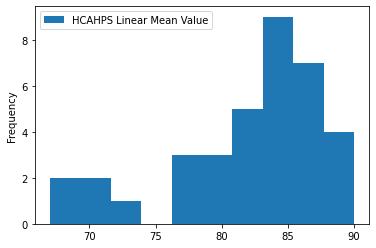

In [302]:
#Check for Normal Distribution
df_checknorm = data_2014_filtered2['HCAHPS Linear Mean Value']
df_checknorm2 = df_checknorm.append(data_2015_filtered2['HCAHPS Linear Mean Value'])
df_checknorm3 = df_checknorm2.append(data_2016_filtered2['HCAHPS Linear Mean Value'])
df_checknorm4 = df_checknorm3.append(data_2017_filtered2['HCAHPS Linear Mean Value'])
df_checknorm5 = df_checknorm4.append(data_2018_filtered2['HCAHPS Linear Mean Value'])
df_checknorm5

df_checknorm6=pd.DataFrame(df_checknorm5)
df_checknorm6[['HCAHPS Linear Mean Value']].plot.hist()

In [303]:
#Average per time period
avg2014 = df1['Satis2014'].mean()
avg2015 = df1['Satis2015'].mean()
avg2016 = df1['Satis2016'].mean()
avg2017 = df1['Satis2017'].mean()
avg2018 = df1['Satis2018'].mean()

print(avg2014)
print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)

80.33333333333333
82.42857142857143
81.16666666666667
81.83333333333333
81.0


In [304]:
#Find Count of hospitals in each year
n_2014=int(df1['Satis2014'].count())
n_2015=int(df1['Satis2015'].count())
n_2016=int(df1['Satis2016'].count())
n_2017=int(df1['Satis2017'].count())
n_2018=int(df1['Satis2018'].count())

print(n_2014)
print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)

6
7
6
6
6


In [305]:
#Standard Deviation of each timeperiod
std2014 = stdall/(math.sqrt(n_2014))
std2015 = stdall/(math.sqrt(n_2015))
std2016 = stdall/(math.sqrt(n_2016))
std2017 = stdall/(math.sqrt(n_2017))
std2018 = stdall/(math.sqrt(n_2018))

print(std2014)
print(std2015)
print(std2016)
print(std2017)
print(std2018)

2.428746492289701
2.248582319813885
2.428746492289701
2.428746492289701
2.428746492289701


In [309]:
zstat = 1.96

In [310]:
#Create dataframe holding values that will support the calculation of UCL and LCL
df3 = [['2014',avgsatis_sib_2014,avg2014,std2014,avgall,zstat],
       ['2015',avgsatis_sib_2015,avg2015,std2015,avgall,zstat],
       ['2016',avgsatis_sib_2016,avg2016,std2016,avgall,zstat],
       ['2017',avgsatis_sib_2017,avg2017,std2017,avgall,zstat],
       ['2018',avgsatis_sib_2018,avg2018,std2018,avgall,zstat]]
df3

[['2014', 78.0, 80.33333333333333, 2.428746492289701, 81.75, 1.96],
 ['2015', 84.0, 82.42857142857143, 2.248582319813885, 81.75, 1.96],
 ['2016', 86.0, 81.16666666666667, 2.428746492289701, 81.75, 1.96],
 ['2017', 85.0, 81.83333333333333, 2.428746492289701, 81.75, 1.96],
 ['2018', 87.0, 81.0, 2.428746492289701, 81.75, 1.96]]

In [311]:
#add column names to the df3 dataframe
df4 = pd.DataFrame(df3,columns = ['Year', 'Sibley Memorial', 'Avg Satisfaction DC Hosp', 
                                  'StdPerTime', 'Avg Satisfaction All', 'zstat'])
df4

,Year,Sibley Memorial,Avg Satisfaction DC Hosp,StdPerTime,Avg Satisfaction All,zstat
0,2014,78.0,80.333333,2.428746,81.75,1.96
1,2015,84.0,82.428571,2.248582,81.75,1.96
2,2016,86.0,81.166667,2.428746,81.75,1.96
3,2017,85.0,81.833333,2.428746,81.75,1.96
4,2018,87.0,81.000000,2.428746,81.75,1.96


In [312]:
#Calculate the UCL and LCL columns
df4['UCL for DC Hospitals']=df4['Avg Satisfaction All']+df4['zstat']*df4['StdPerTime']
df4['LCL for DC Hospitals']=df4['Avg Satisfaction All']-df4['zstat']*df4['StdPerTime']
df4

,Year,Sibley Memorial,Avg Satisfaction DC Hosp,StdPerTime,Avg Satisfaction All,zstat,UCL for DC Hospitals,LCL for DC Hospitals
0,2014,78.0,80.333333,2.428746,81.75,1.96,86.510343,76.989657
1,2015,84.0,82.428571,2.248582,81.75,1.96,86.157221,77.342779
2,2016,86.0,81.166667,2.428746,81.75,1.96,86.510343,76.989657
3,2017,85.0,81.833333,2.428746,81.75,1.96,86.510343,76.989657
4,2018,87.0,81.000000,2.428746,81.75,1.96,86.510343,76.989657


Text(0, 0.5, 'Satisfaction Rating')

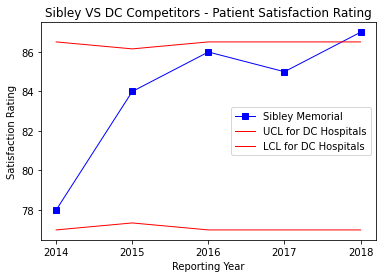

In [313]:
#Create the xbar chart

plt.plot('Year','Sibley Memorial',data=df4,marker = 's', markerfacecolor = 'blue',
         linewidth =1, color = 'blue')

plt.plot('Year','UCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.plot('Year','LCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.legend()
plt.title('Sibley VS DC Competitors - Patient Satisfaction Rating')
plt.xlabel('Reporting Year')
plt.ylabel('Satisfaction Rating')

# Question 5

In [430]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [433]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = -1.96
N = 10
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

NameError: name 'sigma' is not defined

# Question 12

In [29]:
#Import Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [30]:
#Read data fileshaving Measure start data starting on 2014 to represent the 5 time period
data_2014=pd.read_csv('HCAHPS_2015.csv',engine='python')
data_2015=pd.read_csv('HCAHPS_2016.csv',engine='python')
data_2016=pd.read_csv('HCAHPS_2017.csv',engine='python')
data_2017=pd.read_csv('HCAHPS_2018.csv',engine='python')
data_2018=pd.read_csv('HCAHPS_2019.csv',engine='python')

In [31]:
#View data in dataframe for 2018
data_2018.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,74,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,8,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,18,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,88,558,NaN,23,NaN,01/01/2018,12/31/2018
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,558,NaN,23,NaN,01/01/2018,12/31/2018


In [32]:
#Display column names for each of the data frames.
#Notice that some crtical column names have changed for the 2018 dataset
print("\033[1m" +'2014 Data Types' + "\033[0m")
print(data_2014.columns)

print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015.columns)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016.columns)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017.columns)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018.columns)

2014 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date'],
      dtype='object')
2015 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Numb

In [33]:
#Create seperate dataframes with limites number of selected columns for each time period
data_2014_filtered=pd.DataFrame(data_2014, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2014_filtered=data_2014_filtered[data_2014_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2015_filtered=pd.DataFrame(data_2015, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2015_filtered=data_2015_filtered[data_2015_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2016_filtered=pd.DataFrame(data_2016, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2016_filtered=data_2016_filtered[data_2016_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2017_filtered=pd.DataFrame(data_2017, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2017_filtered=data_2017_filtered[data_2017_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2018_filtered=pd.DataFrame(data_2018, columns=['Facility ID', 'Facility Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Start Date', 'End Date'])
data_2018_filtered=data_2018_filtered[data_2018_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

In [34]:
#Check resulting dataframe for 2018
data_2018_filtered.head()

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Start Date,End Date
52,010001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,86,01/01/2018,12/31/2018
145,010005,MARSHALL MEDICAL CENTER SOUTH,H_COMP_6_LINEAR_SCORE,88,01/01/2018,12/31/2018
238,010006,NORTH ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,82,01/01/2018,12/31/2018
331,010007,MIZELL MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,85,01/01/2018,12/31/2018
424,010008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_6_LINEAR_SCORE,Not Available,01/01/2018,12/31/2018


In [35]:
print("\033[1m" +'2014 Data Types' + "\033[0m")
print(data_2014_filtered.dtypes)

print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015_filtered.dtypes)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016_filtered.dtypes)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017_filtered.dtypes)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018_filtered.dtypes)

2014 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2015 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2016 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2017 Data Types
Provider ID                 object
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2018 Data Types
Facility ID             

In [36]:
#Replace the "Not Available" entries with 0 and convert HCAHPS Linear Mean Value column to a float
data_2014_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2014_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2014_filtered = data_2014_filtered.replace(np.nan,0,regex=True)

data_2015_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2015_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2015_filtered = data_2015_filtered.replace(np.nan,0,regex=True)

data_2016_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2016_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2016_filtered = data_2016_filtered.replace(np.nan,0,regex=True)

data_2017_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2017_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2017_filtered = data_2017_filtered.replace(np.nan,0,regex=True)

data_2018_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2018_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2018_filtered = data_2018_filtered.replace(np.nan,0,regex=True)

In [37]:
print("\033[1m" +'2014 HCAHP Mean Value Float type' + "\033[0m")
print(data_2014_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2015 HCAHP Mean Value Float type' + "\033[0m")
print(data_2015_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2016 HCAHP Mean Value Float type' + "\033[0m")
print(data_2016_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2017 HCAHP Mean Value Float type' + "\033[0m")
print(data_2017_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2018 HCAHP Mean Value Float type' + "\033[0m")
print(data_2018_filtered['HCAHPS Linear Mean Value'].head(10))

2014 HCAHP Mean Value Float type
31     85.0
86     89.0
141    82.0
196    82.0
251     0.0
306    86.0
361    88.0
416    85.0
471     0.0
526    87.0
Name: HCAHPS Linear Mean Value, dtype: float64
2015 HCAHP Mean Value Float type
31     89.0
86     88.0
141    84.0
196    86.0
251     0.0
306    85.0
361    87.0
416    86.0
471     0.0
526    86.0
Name: HCAHPS Linear Mean Value, dtype: float64
2016 HCAHP Mean Value Float type
31     87.0
86     89.0
141    86.0
196    88.0
251     0.0
306    86.0
361    88.0
416    86.0
471     0.0
526    89.0
Name: HCAHPS Linear Mean Value, dtype: float64
2017 HCAHP Mean Value Float type
26     85.0
76     89.0
126    85.0
176    87.0
226     0.0
276    86.0
326    87.0
376    88.0
426     0.0
476    87.0
Name: HCAHPS Linear Mean Value, dtype: float64
2018 HCAHP Mean Value Float type
52     86.0
145    88.0
238    82.0
331    85.0
424     0.0
517    85.0
610    85.0
703    87.0
796     0.0
889    85.0
Name: HCAHPS Linear Mean Value, dtype: float64


In [38]:
data_2018_filtered.head()

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Start Date,End Date
52,010001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,86.0,01/01/2018,12/31/2018
145,010005,MARSHALL MEDICAL CENTER SOUTH,H_COMP_6_LINEAR_SCORE,88.0,01/01/2018,12/31/2018
238,010006,NORTH ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,82.0,01/01/2018,12/31/2018
331,010007,MIZELL MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,85.0,01/01/2018,12/31/2018
424,010008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_6_LINEAR_SCORE,0.0,01/01/2018,12/31/2018


In [39]:
pids = ['SIBLEY MEMORIAL HOSPITAL', 'GEORGE WASHINGTON NUIV HOSPITAL', 'HOWARD UNIVERSITY HOSPITAL', 
        'PROVIDENCE HOSPITAL', 'UNITED MEDICAL CENTER', 
        'MEDSTAR WASHINGTON HOSPITAL CENTER', 'CHILDREN''S HOSPITAL NMC']

In [40]:
data_2014_filtered2 = pd.DataFrame(data_2014_filtered[(data_2014_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2014 Filtered Dataset' + "\033[0m")
print(data_2014_filtered2.head(3))

data_2015_filtered2 = pd.DataFrame(data_2015_filtered[(data_2015_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2.head(3))

data_2016_filtered2 = pd.DataFrame(data_2016_filtered[(data_2016_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2.head(3))

data_2017_filtered2 = pd.DataFrame(data_2017_filtered[(data_2017_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2.head(3))

data_2018_filtered2 = pd.DataFrame(data_2018_filtered[(data_2018_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2.head(3))

2014 Filtered Dataset
       Provider ID               Hospital Name      HCAHPS Measure ID  \
2561         10090         PROVIDENCE HOSPITAL  H_COMP_6_LINEAR_SCORE   
38861        90003  HOWARD UNIVERSITY HOSPITAL  H_COMP_6_LINEAR_SCORE   
38971        90005    SIBLEY MEMORIAL HOSPITAL  H_COMP_6_LINEAR_SCORE   

       HCAHPS Linear Mean Value Measure Start Date Measure End Date  
2561                       84.0         04/01/2014       03/31/2015  
38861                      81.0         04/01/2014       03/31/2015  
38971                      78.0         04/01/2014       03/31/2015  
2015 Filtered Dataset
       Provider ID               Hospital Name      HCAHPS Measure ID  \
2561         10090         PROVIDENCE HOSPITAL  H_COMP_6_LINEAR_SCORE   
39851        90003  HOWARD UNIVERSITY HOSPITAL  H_COMP_6_LINEAR_SCORE   
39961        90005    SIBLEY MEMORIAL HOSPITAL  H_COMP_6_LINEAR_SCORE   

       HCAHPS Linear Mean Value Measure Start Date Measure End Date  
2561                

In [41]:
#Number of rows and columns from filtered dataframes
print(data_2014_filtered2.shape)
print(data_2015_filtered2.shape)
print(data_2016_filtered2.shape)
print(data_2017_filtered2.shape)
print(data_2018_filtered2.shape)

(6, 6)
(7, 6)
(6, 6)
(6, 6)
(6, 6)


In [42]:
#Calculate average satisfation at Sibley Hospital across all 5 time periods
hosp = ['MEDSTAR WASHINGTON HOSPITAL CENTER']

data_2014_m = pd.DataFrame(data_2014_filtered2[(data_2014_filtered2['Hospital Name'].isin(hosp))])
avgsatis_m_2014 = data_2014_m['HCAHPS Linear Mean Value'].mean()

data_2015_m = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'].isin(hosp))])
avgsatis_m_2015 = data_2015_m['HCAHPS Linear Mean Value'].mean()

data_2016_m = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'].isin(hosp))])
avgsatis_m_2016 = data_2016_m['HCAHPS Linear Mean Value'].mean()

data_2017_m = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'].isin(hosp))])
avgsatis_m_2017 = data_2017_m['HCAHPS Linear Mean Value'].mean()

data_2018_m = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Facility Name'].isin(hosp))])
avgsatis_m_2018 = data_2018_m['HCAHPS Linear Mean Value'].mean()

print(avgsatis_m_2014)
print(avgsatis_m_2015)
print(avgsatis_m_2016)
print(avgsatis_m_2017)
print(avgsatis_m_2018)

84.0
87.0
85.0
85.0
84.0


In [43]:
#Calculate average satisfaction across all other DC hospitals for the 5 time periods
#data_2014_filtered2['avg_statisfaction_2014']=data_2014_filtered2['HCAHPS Linear Mean Value'].mean()

data_2014_dc = pd.DataFrame(data_2014_filtered2[(data_2014_filtered2['Hospital Name'] != 'MEDSTAR WASHINGTON HOSPITAL CENTER')])
avgsatis_dc_2014 = data_2014_dc['HCAHPS Linear Mean Value'].mean()

data_2015_dc = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'] != 'MEDSTAR WASHINGTON HOSPITAL CENTER')])
avgsatis_dc_2015 = data_2015_dc['HCAHPS Linear Mean Value'].mean()

data_2016_dc = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'] != 'MEDSTAR WASHINGTON HOSPITAL CENTER')])
avgsatis_dc_2016 = data_2016_dc['HCAHPS Linear Mean Value'].mean()

data_2017_dc = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'] != 'MEDSTAR WASHINGTON HOSPITAL CENTER')])
avgsatis_dc_2017 = data_2017_dc['HCAHPS Linear Mean Value'].mean()

data_2018_dc = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Facility Name'] != 'MEDSTAR WASHINGTON HOSPITAL CENTER')])
avgsatis_dc_2018 = data_2018_dc['HCAHPS Linear Mean Value'].mean()

print(avgsatis_dc_2014)
print(avgsatis_dc_2015)
print(avgsatis_dc_2016)
print(avgsatis_dc_2017)
print(avgsatis_dc_2018)

77.8
81.0
80.4
80.6
79.8


In [44]:
#Create a data frame containing dc and sibley data from all 5 years in order to deterime grand average

df_all = [data_2014_filtered2['HCAHPS Linear Mean Value'],data_2015_filtered2['HCAHPS Linear Mean Value'],
          data_2016_filtered2['HCAHPS Linear Mean Value'],data_2017_filtered2['HCAHPS Linear Mean Value'],
          data_2018_filtered2['HCAHPS Linear Mean Value']]

headers = ['AllSatis2014', 'AllSatis2015', 'AllSatis2016', 'AllSatis2017', 'AllSatis2018']

df1_all=pd.concat(df_all, axis=1,keys=headers)
df1_all.head()

,AllSatis2014,AllSatis2015,AllSatis2016,AllSatis2017,AllSatis2018
2326,NaN,NaN,NaN,85.0,NaN
2561,84.0,86.0,86.0,NaN,NaN
4237,NaN,NaN,NaN,NaN,84.0
36326,NaN,NaN,NaN,81.0,NaN
36426,NaN,NaN,NaN,85.0,NaN


In [45]:
#Grand Average
avgall=df1_all.stack().mean()
avgall

80.7741935483871

In [46]:
#Standard Deviation for all data across the 5 years (includes Sibley data)
stdall=df1_all.stack().std()
stdall

5.823570940121161

In [47]:
#Create a data frame containing DC satisfaction data from all 5years
df=[data_2014_dc['HCAHPS Linear Mean Value'],data_2015_dc['HCAHPS Linear Mean Value'],
    data_2016_dc['HCAHPS Linear Mean Value'],data_2017_dc['HCAHPS Linear Mean Value'],
    data_2018_dc['HCAHPS Linear Mean Value']]

headers = ['Satis2014', 'Satis2015', 'Satis2016', 'Satis2017', 'Satis2018']

df1=pd.concat(df, axis=1,keys=headers)
df1.head()

,Satis2014,Satis2015,Satis2016,Satis2017,Satis2018
2326,NaN,NaN,NaN,85.0,NaN
2561,84.0,86.0,86.0,NaN,NaN
4237,NaN,NaN,NaN,NaN,84.0
36326,NaN,NaN,NaN,81.0,NaN
36426,NaN,NaN,NaN,85.0,NaN


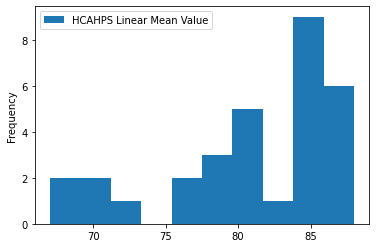

In [48]:
#Check for Normal Distribution
df_checknorm = data_2014_filtered2['HCAHPS Linear Mean Value']
df_checknorm2 = df_checknorm.append(data_2015_filtered2['HCAHPS Linear Mean Value'])
df_checknorm3 = df_checknorm2.append(data_2016_filtered2['HCAHPS Linear Mean Value'])
df_checknorm4 = df_checknorm3.append(data_2017_filtered2['HCAHPS Linear Mean Value'])
df_checknorm5 = df_checknorm4.append(data_2018_filtered2['HCAHPS Linear Mean Value'])
df_checknorm5

df_checknorm6=pd.DataFrame(df_checknorm5)
df_checknorm6[['HCAHPS Linear Mean Value']].plot.hist()

In [49]:
#Average per time period
avg2014 = df1['Satis2014'].mean()
avg2015 = df1['Satis2015'].mean()
avg2016 = df1['Satis2016'].mean()
avg2017 = df1['Satis2017'].mean()
avg2018 = df1['Satis2018'].mean()

print(avg2014)
print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)

77.8
81.0
80.4
80.6
79.8


In [50]:
#Find Count of hospitals in each year
n_2014=int(df1['Satis2014'].count())
n_2015=int(df1['Satis2015'].count())
n_2016=int(df1['Satis2016'].count())
n_2017=int(df1['Satis2017'].count())
n_2018=int(df1['Satis2018'].count())

print(n_2014)
print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)

5
6
5
5
5


In [51]:
#Standard Deviation of each timeperiod
std2014 = stdall/(math.sqrt(n_2014))
std2015 = stdall/(math.sqrt(n_2015))
std2016 = stdall/(math.sqrt(n_2016))
std2017 = stdall/(math.sqrt(n_2017))
std2018 = stdall/(math.sqrt(n_2018))

print(std2014)
print(std2015)
print(std2016)
print(std2017)
print(std2018)

2.6043800987806542
2.3774628806994955
2.6043800987806542
2.6043800987806542
2.6043800987806542


In [52]:
zstat = 1.96

In [53]:
#Create dataframe holding values that will support the calculation of UCL and LCL
df3 = [['2014',avgsatis_m_2014,avg2014,std2014,avgall,zstat],
       ['2015',avgsatis_m_2015,avg2015,std2015,avgall,zstat],
       ['2016',avgsatis_m_2016,avg2016,std2016,avgall,zstat],
       ['2017',avgsatis_m_2017,avg2017,std2017,avgall,zstat],
       ['2018',avgsatis_m_2018,avg2018,std2018,avgall,zstat]]
df3

[['2014', 84.0, 77.8, 2.6043800987806542, 80.7741935483871, 1.96],
 ['2015', 87.0, 81.0, 2.3774628806994955, 80.7741935483871, 1.96],
 ['2016', 85.0, 80.4, 2.6043800987806542, 80.7741935483871, 1.96],
 ['2017', 85.0, 80.6, 2.6043800987806542, 80.7741935483871, 1.96],
 ['2018', 84.0, 79.8, 2.6043800987806542, 80.7741935483871, 1.96]]

In [58]:
#add column names to the df3 dataframe
df4 = pd.DataFrame(df3,columns = ['Year', 'Johns Hopkins Hospital', 'Avg Satisfaction DC Hosp', 
                                  'StdPerTime', 'Avg Satisfaction All', 'zstat'])
df4

,Year,Johns Hopkins Hospital,Avg Satisfaction DC Hosp,StdPerTime,Avg Satisfaction All,zstat
0,2014,84.0,77.8,2.604380,80.774194,1.96
1,2015,87.0,81.0,2.377463,80.774194,1.96
2,2016,85.0,80.4,2.604380,80.774194,1.96
3,2017,85.0,80.6,2.604380,80.774194,1.96
4,2018,84.0,79.8,2.604380,80.774194,1.96


In [60]:
#Calculate the UCL and LCL columns
df4['UCL for DC Hospitals']=df4['Avg Satisfaction All']+df4['zstat']*df4['StdPerTime']
df4['LCL for DC Hospitals']=df4['Avg Satisfaction All']-df4['zstat']*df4['StdPerTime']
df4

,Year,Johns Hopkins Hospital,Avg Satisfaction DC Hosp,StdPerTime,Avg Satisfaction All,zstat,UCL for DC Hospitals,LCL for DC Hospitals
0,2014,84.0,77.8,2.604380,80.774194,1.96,85.878779,75.669609
1,2015,87.0,81.0,2.377463,80.774194,1.96,85.434021,76.114366
2,2016,85.0,80.4,2.604380,80.774194,1.96,85.878779,75.669609
3,2017,85.0,80.6,2.604380,80.774194,1.96,85.878779,75.669609
4,2018,84.0,79.8,2.604380,80.774194,1.96,85.878779,75.669609


Text(0, 0.5, 'Satisfaction Rating')

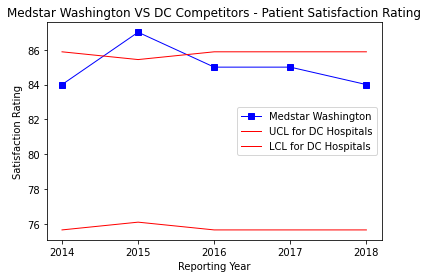

In [56]:
#Create the xbar chart

plt.plot('Year','Medstar Washington',data=df4,marker = 's', markerfacecolor = 'blue',
         linewidth =1, color = 'blue')

plt.plot('Year','UCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.plot('Year','LCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.legend()
plt.title('Medstar Washington VS DC Competitors - Patient Satisfaction Rating')
plt.xlabel('Reporting Year')
plt.ylabel('Satisfaction Rating')

Text(0, 0.5, 'Satisfaction Rating')

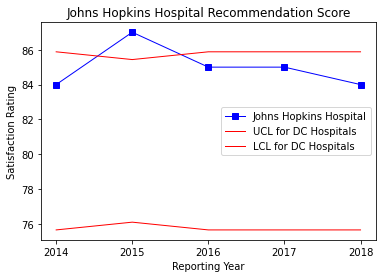

In [61]:
#Create the xbar chart

plt.plot('Year','Johns Hopkins Hospital',data=df4,marker = 's', markerfacecolor = 'blue',
         linewidth =1, color = 'blue')

plt.plot('Year','UCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.plot('Year','LCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.legend()
plt.title('Johns Hopkins Hospital Recommendation Score')
plt.xlabel('Reporting Year')
plt.ylabel('Satisfaction Rating')